In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
cityDF = pd.read_csv(city_data_to_load)
rideDF = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
pyberDF = pd.merge(rideDF, cityDF, on='city', how='left')

# Display the data table for preview
pyberDF.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [2]:
# Determine amount of rides per city
cityGroup = pyberDF.groupby('city')
rideCount = cityGroup.count()

In [3]:
# Determine average fare per city
avgFare = cityGroup['fare'].mean()

In [4]:
# Create DF based on cityGroup, including average fare and number of rides per city
fareDF = pd.DataFrame(avgFare)
fareDF['Ride Count'] = rideCount['ride_id']

# Rename 'fare' column for clarity
fareDF.rename(columns={'fare': 'Average Fare'}, inplace=True)

# Reset Index
fareDF.reset_index(inplace=True)

In [5]:
# Merge fareDF with cityDF to get necessary info for plotting
combinedDF = pd.merge(cityDF, fareDF, how='outer')

In [6]:
# Determine city types
# print(pyberDF['type'].unique())

In [7]:
# Create DFs for each city type
urbanDF = combinedDF.loc[combinedDF['type'] == 'Urban', :]

suburbanDF = combinedDF.loc[combinedDF['type'] == 'Suburban', :]

ruralDF = combinedDF.loc[combinedDF['type'] == 'Rural', :]

## Bubble Plot of Ride Sharing Data

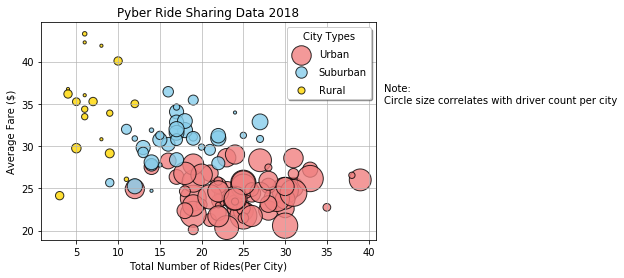

In [8]:
# Obtain the x, y and s coordinates for each of the three city types
urbanX = urbanDF['Ride Count']
urbanY = urbanDF['Average Fare']
urbanS = urbanDF['driver_count']*10 # Enlarges circle size for better viewability

suburbanX = suburbanDF['Ride Count']
suburbanY = suburbanDF['Average Fare']
suburbanS = suburbanDF['driver_count']*10

ruralX = ruralDF['Ride Count']
ruralY = ruralDF['Average Fare']
ruralS = ruralDF['driver_count']*10
                  
# Build the scatter plots for each city types
plt.scatter(urbanX, urbanY, s=urbanS, marker='o', color='LightCoral', label='Urban', alpha=.80, edgecolors='Black')
plt.scatter(suburbanX, suburbanY, s=suburbanS, marker='o', color='SkyBlue', label='Suburban', alpha=.8, edgecolors='Black')
plt.scatter(ruralX, ruralY, s=ruralS, marker='o', color='Gold', label='Rural', alpha=.80, edgecolors='Black')

# Incorporate the other graph properties
plt.grid(alpha=.8)
plt.title('Pyber Ride Sharing Data 2018')
plt.xlabel('Total Number of Rides(Per City)')
plt.ylabel('Average Fare ($)')

# Create a legend
plt.legend(labelspacing=.78, title='City Types', shadow=True)

# Incorporate a text label regarding circle size
plt.figtext(.92, .6,'Note:\nCircle size correlates with driver count per city')

# Save Figure
plt.savefig('pyber_bubble_plot.png', bbox_inches='tight')

In [9]:
# Show plot
plt.show()

## Total Fares by City Type

In [10]:
#Create 'type' grouping
typeGroup = pyberDF.groupby('type')

# Create variables for all pie charts

labels = ['Urban', 'Suburban', 'Rural']
colors = ['LightCoral', 'SkyBlue', 'Gold']
explode = (0.1, 0, 0)
autopct = '%1.1f%%'

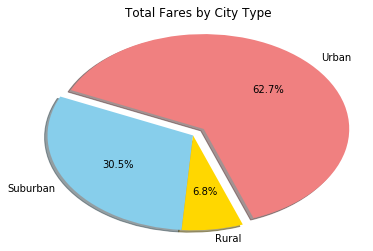

In [11]:
# Calculate Type Percents
urbanFare = typeGroup['fare'].sum().Urban
suburbanFare = typeGroup['fare'].sum().Suburban
ruralFare = typeGroup['fare'].sum().Rural

# Build Pie Chart
totalFares = [urbanFare, suburbanFare, ruralFare]

plt.pie(totalFares, labels=labels, colors=colors, explode=explode, autopct=autopct, shadow=True, startangle=290)

plt.title('Total Fares by City Type')
plt.axis('auto')

# Save Figure
plt.savefig('total_fares_pie.png', bbox_inches='tight')

In [12]:
# Show Figure
plt.show()

## Total Rides by City Type

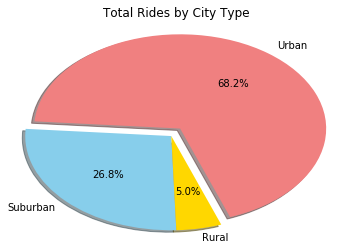

In [13]:
# Calculate Ride Percents
urbanRides = typeGroup['ride_id'].sum().Urban
suburbanRides = typeGroup['ride_id'].sum().Suburban
ruralRides = typeGroup['ride_id'].sum().Rural

# Build Pie Chart
totalRides = [urbanRides, suburbanRides, ruralRides]

plt.pie(totalRides, labels=labels, colors=colors, explode=explode, autopct=autopct, shadow=True, startangle=290)

plt.title('Total Rides by City Type')
plt.axis('auto')

# Save Figure

plt.savefig('total_rides_pie.png', bbox_inches='tight')

In [14]:
# Show Figure
plt.show()

## Total Drivers by City Type

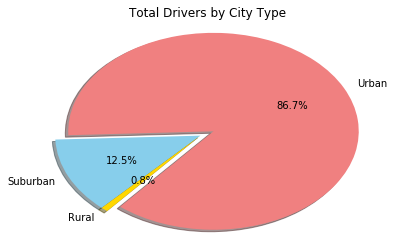

In [15]:
# Calculate Driver Percents
urbanDrivers = typeGroup['driver_count'].sum().Urban
suburbanDrivers = typeGroup['driver_count'].sum().Suburban
ruralDrivers = typeGroup['driver_count'].sum().Rural

# Build Pie Charts
totalDrivers = [urbanDrivers, suburbanDrivers, ruralDrivers]

plt.pie(totalDrivers, labels=labels, colors=colors, explode=explode, autopct=autopct, shadow=True, startangle=230)

plt.title('Total Drivers by City Type')
plt.axis('auto')

# Save Figure
plt.savefig('total_drivers_pie.png', bbox_inches='tight')

In [16]:
# Show Figure
plt.show()